In [88]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import joblib
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score, accuracy_score,f1_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.inspection import permutation_importance

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score


In [89]:
train = pd.read_csv('s3://germancreditcsr/datos/original/datos/train.csv', index_col=0)

test = pd.read_csv('s3://germancreditcsr/datos/original/datos/test.csv', index_col=0)

In [90]:
sub_train, val = train_test_split(train, test_size=0.3, random_state=42)


In [91]:
X_train=  sub_train.drop('Risk' , axis= 1 )

In [92]:
y_train = sub_train['Risk']

In [93]:
X_train = pd.get_dummies(X_train)

In [94]:
X_val=  val.drop('Risk' , axis= 1 )

In [95]:
y_val = val['Risk']

In [96]:
X_val = pd.get_dummies(X_val)

In [97]:
modelo = DecisionTreeClassifier(
            max_depth         = 4,
            random_state      = 1000      )





In [98]:
# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1000)

In [99]:
r = permutation_importance(modelo, X_val, y_val, n_repeats=62)

In [100]:
r

{'importances_mean': array([ 0.00084485, -0.00284178, -0.00967742,  0.00545315,  0.        ,
         0.        ,  0.        ,  0.00691244,  0.        , -0.00637481,
         0.        ,  0.        ,  0.        , -0.00606759,  0.00460829,
         0.        ,  0.        ,  0.        ,  0.        ,  0.003149  ,
         0.        ,  0.        ,  0.        ,  0.        ]),
 'importances_std': array([0.00564242, 0.00377283, 0.00427356, 0.0180792 , 0.        ,
        0.        , 0.        , 0.00416166, 0.        , 0.00622309,
        0.        , 0.        , 0.        , 0.01131954, 0.0134134 ,
        0.        , 0.        , 0.        , 0.        , 0.00651032,
        0.        , 0.        , 0.        , 0.        ]),
 'importances': array([[ 0.00952381,  0.        , -0.0047619 , ...,  0.        ,
         -0.00952381, -0.0047619 ],
        [ 0.        , -0.0047619 , -0.0047619 , ..., -0.0047619 ,
         -0.0047619 ,  0.        ],
        [-0.00952381, -0.00952381, -0.01428571, ..., -0.00

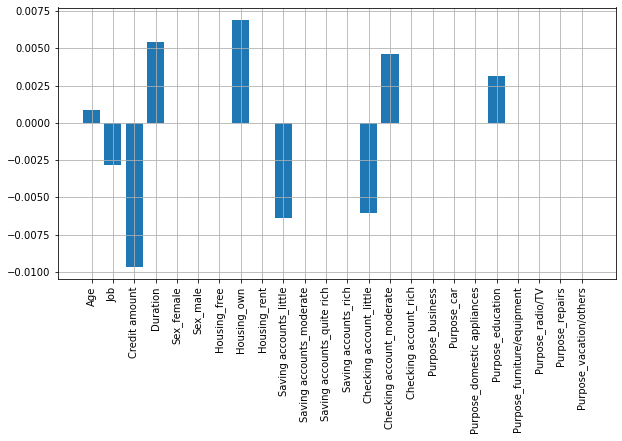

In [101]:

plt.figure(figsize=(10,5))
plt.bar(x=X_train.columns, height=r[ 'importances_mean'])

plt.xticks(rotation=90)
plt.grid()
plt.show()

In [102]:
accuracy_score(modelo.predict(X_val),y_val)

0.6476190476190476

In [103]:
train = pd.read_csv('s3://germancreditcsr/datos/original/datos/train.csv', index_col=0)

test = pd.read_csv('s3://germancreditcsr/datos/original/datos/test.csv', index_col=0)

In [104]:
X_train = train.drop("Risk", axis=1)
X_train = pd.get_dummies(X_train)
y_train = train["Risk"]

In [105]:
from sklearn.model_selection import KFold, StratifiedKFold

In [106]:
k_fold = KFold(n_splits=3)
k_fold 

KFold(n_splits=3, random_state=None, shuffle=False)

In [208]:
for train_indices, val_indices in k_fold.split(X_train, y_train):
    model=DecisionTreeClassifier(max_depth=3)
    X_sub_train = X_train.iloc[train_indices,:]
    y_sub_train = y_train.iloc[train_indices]

    model.fit(X_sub_train,y_sub_train)
    
    X_val = X_train.iloc[val_indices,:]
    y_val = y_train.iloc[val_indices]
    
   
    #print('acurracy train',accuracy_score(y_sub_train, model.predict(X_sub_train)))
    #print('acuracy val',accuracy_score(y_val, model.predict(X_val)))
    accuracy_subtrain=accuracy_score(y_sub_train, model.predict(X_sub_train))
    acum_train=accuracy_subtrain
    accuracy_val=accuracy_score(y_val, model.predict(X_val))
    acum_val=accuracy_val
    r = permutation_importance(modelo, X_val, y_val, n_repeats=62)
    
    average_train=acum_train.mean()
    average_val=acum_val.mean()
    
    print('av_train',average_train)
    print('av_val',average_val)
    
    
 
   
        

av_train 0.7467811158798283
av_val 0.7393162393162394
av_train 0.7751605995717344
av_val 0.6609442060085837
av_train 0.7687366167023555
av_val 0.6609442060085837


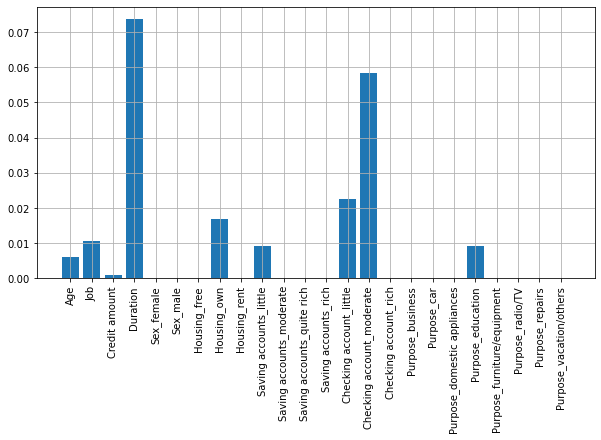

In [187]:


plt.figure(figsize=(10,5))
plt.bar(x=X_train.columns, height=r[ 'importances_mean'])

plt.xticks(rotation=90)
plt.grid()
plt.show()